# Proyek Analisis Data: Bike Sharing Dataset
- **Nama:** Nathania Made Callysta Pramusita
- **Email:** nathaniamade@gmail.com
- **ID Dicoding:** nathania_made

## Menentukan Pertanyaan Bisnis

- Ada berapa hari libur di tahun 2011-2012? Bagaimana persebarannya di tiap harinya?
- Bagaimana tren penggunaan sepeda berubah sepanjang hari?
- Seberapa besar peningkatan penggunaan sepeda pada akhir pekan (Sabtu, Minggu) dibandingkan hari kerja?
- Bagaimana performa penggunaan sepeda di hari libur?

## Import Semua Packages/Library yang Digunakan

Mengimport semua Packages/Library

In [155]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

## Data Wrangling

### Gathering Data

Mengimport semua data yang diperlukan, bike_h untuk untuk data per jam, bike_d untuk data per hari.

In [156]:
bike_h = pd.read_csv("hour.csv", delimiter=",")
bike_d = pd.read_csv("day.csv", delimiter=",")

In [157]:
# data per jam
bike_h

,instant,dteday,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2011-01-01,1,0,1,0,0,6,0,1,0.24,0.2879,0.81,0.0000,3,13,16
1,2,2011-01-01,1,0,1,1,0,6,0,1,0.22,0.2727,0.80,0.0000,8,32,40
2,3,2011-01-01,1,0,1,2,0,6,0,1,0.22,0.2727,0.80,0.0000,5,27,32
3,4,2011-01-01,1,0,1,3,0,6,0,1,0.24,0.2879,0.75,0.0000,3,10,13
4,5,2011-01-01,1,0,1,4,0,6,0,1,0.24,0.2879,0.75,0.0000,0,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
17374,17375,2012-12-31,1,1,12,19,0,1,1,2,0.26,0.2576,0.60,0.1642,11,108,119
17375,17376,2012-12-31,1,1,12,20,0,1,1,2,0.26,0.2576,0.60,0.1642,8,81,89
17376,17377,2012-12-31,1,1,12,21,0,1,1,1,0.26,0.2576,0.60,0.1642,7,83,90
17377,17378,2012-12-31,1,1,12,22,0,1,1,1,0.26,0.2727,0.56,0.1343,13,48,61


In [158]:
# data per hari
bike_d

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2011-01-01,1,0,1,0,6,0,2,0.344167,0.363625,0.805833,0.160446,331,654,985
1,2,2011-01-02,1,0,1,0,0,0,2,0.363478,0.353739,0.696087,0.248539,131,670,801
2,3,2011-01-03,1,0,1,0,1,1,1,0.196364,0.189405,0.437273,0.248309,120,1229,1349
3,4,2011-01-04,1,0,1,0,2,1,1,0.200000,0.212122,0.590435,0.160296,108,1454,1562
4,5,2011-01-05,1,0,1,0,3,1,1,0.226957,0.229270,0.436957,0.186900,82,1518,1600
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
726,727,2012-12-27,1,1,12,0,4,1,2,0.254167,0.226642,0.652917,0.350133,247,1867,2114
727,728,2012-12-28,1,1,12,0,5,1,2,0.253333,0.255046,0.590000,0.155471,644,2451,3095
728,729,2012-12-29,1,1,12,0,6,0,2,0.253333,0.242400,0.752917,0.124383,159,1182,1341
729,730,2012-12-30,1,1,12,0,0,0,1,0.255833,0.231700,0.483333,0.350754,364,1432,1796


**Insight:**
- Ukuran data bike_h 17379 x 17.
- Ukuran data bike_d 731 x 16.
- Jelas ukuran bike_h lebih besar daripada bike_d karena 1 hari terdapat 24 jam.

### Assessing Data

#### Assessing data bike_h untuk menilai apakah data sudah siap dianalisis

In [159]:
# menilai data bike_h
bike_h.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17379 entries, 0 to 17378
Data columns (total 17 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     17379 non-null  int64  
 1   dteday      17379 non-null  object 
 2   season      17379 non-null  int64  
 3   yr          17379 non-null  int64  
 4   mnth        17379 non-null  int64  
 5   hr          17379 non-null  int64  
 6   holiday     17379 non-null  int64  
 7   weekday     17379 non-null  int64  
 8   workingday  17379 non-null  int64  
 9   weathersit  17379 non-null  int64  
 10  temp        17379 non-null  float64
 11  atemp       17379 non-null  float64
 12  hum         17379 non-null  float64
 13  windspeed   17379 non-null  float64
 14  casual      17379 non-null  int64  
 15  registered  17379 non-null  int64  
 16  cnt         17379 non-null  int64  
dtypes: float64(4), int64(12), object(1)
memory usage: 2.3+ MB


*   Perhatikan bahwa pada bike_h tidak ada masalah dengan jumlah data di setiap kolom. Namun terdapat masalah pada tipe data untuk kolom dteday. Seharusnya, tipe data pada kolom tersebut adalah datetime, bukan object.
*   Maka dari itu, diperlukan cleaning untuk tipe data di kolom tersebut.

In [160]:
# periksa apakah benar tidak ada masalah dengan jumlah data
bike_h.isna().sum()

,0
instant,0
dteday,0
season,0
yr,0
mnth,0
hr,0
holiday,0
weekday,0
workingday,0
weathersit,0


Dari hasil pengecekan ulang, terbukti bahwa tidak ada missing value pada dataset ini.

In [161]:
# cek apakah ada duplikasi
print("Jumlah duplikasi: ", bike_h.duplicated().sum())

# melihat rincian matematis
bike_h.describe()

Jumlah duplikasi:  0


,instant,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,17379.0000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000
mean,8690.0000,2.501640,0.502561,6.537775,11.546752,0.028770,3.003683,0.682721,1.425283,0.496987,0.475775,0.627229,0.190098,35.676218,153.786869,189.463088
std,5017.0295,1.106918,0.500008,3.438776,6.914405,0.167165,2.005771,0.465431,0.639357,0.192556,0.171850,0.192930,0.122340,49.305030,151.357286,181.387599
min,1.0000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.020000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
25%,4345.5000,2.000000,0.000000,4.000000,6.000000,0.000000,1.000000,0.000000,1.000000,0.340000,0.333300,0.480000,0.104500,4.000000,34.000000,40.000000
50%,8690.0000,3.000000,1.000000,7.000000,12.000000,0.000000,3.000000,1.000000,1.000000,0.500000,0.484800,0.630000,0.194000,17.000000,115.000000,142.000000
75%,13034.5000,3.000000,1.000000,10.000000,18.000000,0.000000,5.000000,1.000000,2.000000,0.660000,0.621200,0.780000,0.253700,48.000000,220.000000,281.000000
max,17379.0000,4.000000,1.000000,12.000000,23.000000,1.000000,6.000000,1.000000,4.000000,1.000000,1.000000,1.000000,0.850700,367.000000,886.000000,977.000000


#### Assessing data bike_d untuk menilai apakah data sudah siap dianalisis

In [162]:
# menilai data bike_h
bike_d.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 731 entries, 0 to 730
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     731 non-null    int64  
 1   dteday      731 non-null    object 
 2   season      731 non-null    int64  
 3   yr          731 non-null    int64  
 4   mnth        731 non-null    int64  
 5   holiday     731 non-null    int64  
 6   weekday     731 non-null    int64  
 7   workingday  731 non-null    int64  
 8   weathersit  731 non-null    int64  
 9   temp        731 non-null    float64
 10  atemp       731 non-null    float64
 11  hum         731 non-null    float64
 12  windspeed   731 non-null    float64
 13  casual      731 non-null    int64  
 14  registered  731 non-null    int64  
 15  cnt         731 non-null    int64  
dtypes: float64(4), int64(11), object(1)
memory usage: 91.5+ KB


*   Perhatikan bahwa pada bike_d tidak ada masalah dengan jumlah data di setiap kolom. Namun terdapat masalah pada tipe data untuk kolom dteday. Seharusnya, tipe data pada kolom tersebut adalah datetime, bukan object.
*   Maka dari itu, diperlukan cleaning untuk tipe data di kolom tersebut.

In [163]:
# periksa apakah benar tidak ada masalah dengan jumlah data
bike_d.isna().sum()

,0
instant,0
dteday,0
season,0
yr,0
mnth,0
holiday,0
weekday,0
workingday,0
weathersit,0
temp,0


In [164]:
# mengecek duplikasi
print("Jumlah duplikasi: ", bike_d.duplicated().sum())

# melihat rincian matematis
bike_d.describe()

Jumlah duplikasi:  0


,instant,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000
mean,366.000000,2.496580,0.500684,6.519836,0.028728,2.997264,0.683995,1.395349,0.495385,0.474354,0.627894,0.190486,848.176471,3656.172367,4504.348837
std,211.165812,1.110807,0.500342,3.451913,0.167155,2.004787,0.465233,0.544894,0.183051,0.162961,0.142429,0.077498,686.622488,1560.256377,1937.211452
min,1.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,0.059130,0.079070,0.000000,0.022392,2.000000,20.000000,22.000000
25%,183.500000,2.000000,0.000000,4.000000,0.000000,1.000000,0.000000,1.000000,0.337083,0.337842,0.520000,0.134950,315.500000,2497.000000,3152.000000
50%,366.000000,3.000000,1.000000,7.000000,0.000000,3.000000,1.000000,1.000000,0.498333,0.486733,0.626667,0.180975,713.000000,3662.000000,4548.000000
75%,548.500000,3.000000,1.000000,10.000000,0.000000,5.000000,1.000000,2.000000,0.655417,0.608602,0.730209,0.233214,1096.000000,4776.500000,5956.000000
max,731.000000,4.000000,1.000000,12.000000,1.000000,6.000000,1.000000,3.000000,0.861667,0.840896,0.972500,0.507463,3410.000000,6946.000000,8714.000000


**Insight:**
*   Pada bike_h dan bike_d tidak ada masalah dengan jumlah data di setiap kolom. Namun terdapat masalah pada tipe data untuk kolom dteday. Seharusnya, tipe data pada kolom tersebut adalah datetime, bukan object.
*   Maka dari itu, diperlukan cleaning untuk tipe data di kolom tersebut.

### Cleaning Data

Akan dilakukan penggatian tipe data pada kolom dteday di kedua dataset.

#### bike_h

In [165]:
# mengubah tipe data menjadi datetime
datetime_columns_h = ["dteday"]

for column in datetime_columns_h:
  bike_h[column] = pd.to_datetime(bike_h[column])

In [166]:
# memastikan tipe data sudah terubah
bike_h.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17379 entries, 0 to 17378
Data columns (total 17 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   instant     17379 non-null  int64         
 1   dteday      17379 non-null  datetime64[ns]
 2   season      17379 non-null  int64         
 3   yr          17379 non-null  int64         
 4   mnth        17379 non-null  int64         
 5   hr          17379 non-null  int64         
 6   holiday     17379 non-null  int64         
 7   weekday     17379 non-null  int64         
 8   workingday  17379 non-null  int64         
 9   weathersit  17379 non-null  int64         
 10  temp        17379 non-null  float64       
 11  atemp       17379 non-null  float64       
 12  hum         17379 non-null  float64       
 13  windspeed   17379 non-null  float64       
 14  casual      17379 non-null  int64         
 15  registered  17379 non-null  int64         
 16  cnt         17379 non-

Terlihat bahwa tipe data sudah berubah.

#### bike_d

In [167]:
# mengubah tipe data menjadi datetime
datetime_columns_d = ["dteday"]

for column in datetime_columns_d:
  bike_d[column] = pd.to_datetime(bike_d[column])

In [169]:
# memastikan tipe data sudah terubah
bike_d.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 731 entries, 0 to 730
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   instant     731 non-null    int64         
 1   dteday      731 non-null    datetime64[ns]
 2   season      731 non-null    int64         
 3   yr          731 non-null    int64         
 4   mnth        731 non-null    int64         
 5   holiday     731 non-null    int64         
 6   weekday     731 non-null    int64         
 7   workingday  731 non-null    int64         
 8   weathersit  731 non-null    int64         
 9   temp        731 non-null    float64       
 10  atemp       731 non-null    float64       
 11  hum         731 non-null    float64       
 12  windspeed   731 non-null    float64       
 13  casual      731 non-null    int64         
 14  registered  731 non-null    int64         
 15  cnt         731 non-null    int64         
dtypes: datetime64[ns](1), floa

Terlihat bahwa tipe data sudah berubah.

In [170]:
# mendownload data untuk keperluan streamlit
bike_d.to_csv("all_data.csv",index=False)

**Insight:**
- Tipe data pada kolom dteday di kedua dataset sudah diperbarui.

## Exploratory Data Analysis (EDA)

### Explore

#### Explore data bike_h untuk melihat apa saja yang dapat dianalisis dan untuk menjawab pertanyaan bisnis. Penjelasan setiap langkahnya akan ditulis menggunakan komentar (tanda pagar (#))

In [171]:
# melihat penjelasan matematika
bike_h.describe()

,instant,dteday,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,17379.0000,17379,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000
mean,8690.0000,2012-01-02 04:08:34.552045568,2.501640,0.502561,6.537775,11.546752,0.028770,3.003683,0.682721,1.425283,0.496987,0.475775,0.627229,0.190098,35.676218,153.786869,189.463088
min,1.0000,2011-01-01 00:00:00,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.020000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
25%,4345.5000,2011-07-04 00:00:00,2.000000,0.000000,4.000000,6.000000,0.000000,1.000000,0.000000,1.000000,0.340000,0.333300,0.480000,0.104500,4.000000,34.000000,40.000000
50%,8690.0000,2012-01-02 00:00:00,3.000000,1.000000,7.000000,12.000000,0.000000,3.000000,1.000000,1.000000,0.500000,0.484800,0.630000,0.194000,17.000000,115.000000,142.000000
75%,13034.5000,2012-07-02 00:00:00,3.000000,1.000000,10.000000,18.000000,0.000000,5.000000,1.000000,2.000000,0.660000,0.621200,0.780000,0.253700,48.000000,220.000000,281.000000
max,17379.0000,2012-12-31 00:00:00,4.000000,1.000000,12.000000,23.000000,1.000000,6.000000,1.000000,4.000000,1.000000,1.000000,1.000000,0.850700,367.000000,886.000000,977.000000
std,5017.0295,NaN,1.106918,0.500008,3.438776,6.914405,0.167165,2.005771,0.465431,0.639357,0.192556,0.171850,0.192930,0.122340,49.305030,151.357286,181.387599


In [174]:
# melakukan grouping tentang berapa banyak hari libur dan hari tidak libur
# hari libur = 0
# hari tidak libur = 1

bike_h.groupby(by="holiday").dteday.count()

,dteday
holiday,
0,16879
1,500


In [173]:
# melakukan perhitungan total cnt (total rental sepeda) di tiap harinya

bike_h_cnt = bike_h.groupby('dteday').cnt.sum()
bike_h_cnt

,cnt
dteday,
2011-01-01,985
2011-01-02,801
2011-01-03,1349
2011-01-04,1562
2011-01-05,1600
...,...
2012-12-27,2114
2012-12-28,3095
2012-12-29,1341


In [175]:
# mengurutkan tanggal berdasarkan total rental terbanyak
bike_h_cnt.sort_values(ascending=False)

,cnt
dteday,
2012-09-15,8714
2012-09-29,8555
2012-09-22,8395
2012-03-23,8362
2012-05-19,8294
...,...
2011-03-06,605
2011-01-26,506
2012-12-26,441


In [176]:
# menghitung berapa banyak total rental per hari di setiap jamnya
count_hour_day = bike_h.groupby(['weekday', 'hr'], as_index=False).cnt.sum()
count_hour_day

,weekday,hr,cnt
0,0,0,9775
1,0,1,8053
2,0,2,6286
3,0,3,3239
4,0,4,955
...,...,...,...
163,6,19,24953
164,6,20,18810
165,6,21,16224
166,6,22,14525


#### Explore data bike_d untuk melihat apa saja yang dapat dianalisis dan untuk menjawab pertanyaan bisnis. Penjelasan setiap langkahnya akan ditulis menggunakan komentar (tanda pagar (#))

In [177]:
# melihat penjelasan matematis
bike_d.describe(include="all")

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,731.000000,731,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000
mean,366.000000,2012-01-01 00:00:00,2.496580,0.500684,6.519836,0.028728,2.997264,0.683995,1.395349,0.495385,0.474354,0.627894,0.190486,848.176471,3656.172367,4504.348837
min,1.000000,2011-01-01 00:00:00,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,0.059130,0.079070,0.000000,0.022392,2.000000,20.000000,22.000000
25%,183.500000,2011-07-02 12:00:00,2.000000,0.000000,4.000000,0.000000,1.000000,0.000000,1.000000,0.337083,0.337842,0.520000,0.134950,315.500000,2497.000000,3152.000000
50%,366.000000,2012-01-01 00:00:00,3.000000,1.000000,7.000000,0.000000,3.000000,1.000000,1.000000,0.498333,0.486733,0.626667,0.180975,713.000000,3662.000000,4548.000000
75%,548.500000,2012-07-01 12:00:00,3.000000,1.000000,10.000000,0.000000,5.000000,1.000000,2.000000,0.655417,0.608602,0.730209,0.233214,1096.000000,4776.500000,5956.000000
max,731.000000,2012-12-31 00:00:00,4.000000,1.000000,12.000000,1.000000,6.000000,1.000000,3.000000,0.861667,0.840896,0.972500,0.507463,3410.000000,6946.000000,8714.000000
std,211.165812,NaN,1.110807,0.500342,3.451913,0.167155,2.004787,0.465233,0.544894,0.183051,0.162961,0.142429,0.077498,686.622488,1560.256377,1937.211452


In [178]:
# menghitung ada beapa hari libur/non libur
# libur = 1
# tidak libur = 0
bike_d_count_holiday = bike_d.groupby(by="holiday").dteday.count()
bike_d_count_holiday

,dteday
holiday,
0,710
1,21


In [179]:
# menghitung total rental sepeda berdasarkan libur/tidaknya hari
bike_d.groupby(by="holiday").cnt.sum()

,cnt
holiday,
0,3214244
1,78435


In [180]:
# melihat total banyaknya hari libur per harinya
weekday_d_holiday = bike_d.groupby('weekday').holiday.sum()
weekday_d_holiday

,holiday
weekday,
0,0
1,15
2,1
3,1
4,2
5,2
6,0


In [181]:
# mengambil data total rental per hari
bike_d_cnt = bike_d.groupby('dteday').cnt.sum()
bike_d_cnt

,cnt
dteday,
2011-01-01,985
2011-01-02,801
2011-01-03,1349
2011-01-04,1562
2011-01-05,1600
...,...
2012-12-27,2114
2012-12-28,3095
2012-12-29,1341


In [182]:
# mengurutkan data dari hari yang memiliki total rental terbanyak
bike_d_cnt.sort_values(ascending=False)

,cnt
dteday,
2012-09-15,8714
2012-09-29,8555
2012-09-22,8395
2012-03-23,8362
2012-05-19,8294
...,...
2011-03-06,605
2011-01-26,506
2012-12-26,441


In [184]:
# menghitung total jumlah hari di setiap harinya
bike_d_weekday_count= bike_d.groupby('weekday').dteday.count()
bike_d_weekday_count

,dteday
weekday,
0,105
1,105
2,104
3,104
4,104
5,104
6,105


In [218]:
# menghitung total rental sepeda untuk tiap harinya
bike_d_weekday= bike_d.groupby(['weekday'], as_index=False).cnt.sum()
bike_d_weekday

,weekday,cnt
0,0,444027
1,1,455503
2,2,469109
3,3,473048
4,4,485395
5,5,487790
6,6,477807


In [188]:
# menghitung rata-rata total rental sepeda
mean = sum(bike_d_weekday)/len(bike_d_weekday)
mean

470382.71428571426

In [187]:
# melakukan penggabungan tabel sehingga diperoleh tabel yang berisi nama hari, total rental sepeda untuk tiap harinya, dan total jumlah hari di tiap harinya
merge_weekday = pd.merge(
    left=bike_d_weekday,
    right=bike_d_weekday_count,
    how="inner",
    left_on="weekday",
    right_on="weekday"
)

merge_weekday

,cnt,dteday
weekday,,
0,444027,105
1,455503,105
2,469109,104
3,473048,104
4,485395,104
5,487790,104
6,477807,105


In [189]:
# menghitung rata-rata total rental sepeda per hari
mean_per_weekday = merge_weekday["cnt"] / merge_weekday["dteday"]
mean_per_weekday

,0
weekday,
0,4228.828571
1,4338.123810
2,4510.663462
3,4548.538462
4,4667.259615
5,4690.288462
6,4550.542857


In [190]:
# menghitung rata-rata rental sepeda pada hari kerja (Senin-Jumat (1-5)) dan pada akhir pekan (Sabtu-Minggu (6-0))
bike_d_weekday_1_5 = (bike_d_weekday[1]+bike_d_weekday[2]+bike_d_weekday[3]+bike_d_weekday[4]+bike_d_weekday[5])/(bike_d_weekday_count[1]+bike_d_weekday_count[2]+bike_d_weekday_count[3]+bike_d_weekday_count[4]+bike_d_weekday_count[5])
bike_d_weekday_6_0 = (bike_d_weekday[0]+bike_d_weekday[6])/(bike_d_weekday_count[0]+bike_d_weekday_count[6])
print("Rata-rata count pada hari kerja (Senin-Jumat):",bike_d_weekday_1_5)
print("Rata-rata count pada akhir pekan (Sabtu-Minggu):",bike_d_weekday_6_0)

Rata-rata count pada hari kerja (Senin-Jumat): 4550.5662188099805
Rata-rata count pada akhir pekan (Sabtu-Minggu): 4389.685714285714


In [191]:
# menggabungkan hasil rata-rata ke sebuah dataframe
mean_weekday = pd.DataFrame({
    'weekday_1_5': [bike_d_weekday_1_5],
    'weekday_6_0': [bike_d_weekday_6_0]
})

mean_weekday

,weekday_1_5,weekday_6_0
0,4550.566219,4389.685714


In [192]:
# melihat growth dari hari kerja ke akhir pekan
growth = (bike_d_weekday_6_0 - bike_d_weekday_1_5) / bike_d_weekday_1_5
print("Growth hari kerja ke akhir pekan:", growth)

Growth hari kerja ke akhir pekan: -0.035353953066161084


In [193]:
# melihat ada berapa hari libur di tiap kategori hari
count_day_holiday_1 = bike_d.groupby('weekday').holiday.sum()
count_day_holiday_1 = count_day_holiday_1.rename("holiday_1")
count_day_holiday_1

,holiday_1
weekday,
0,0
1,15
2,1
3,1
4,2
5,2
6,0


In [194]:
# menghitung banyaknya rental per harinya (jika hari tersebut bukan hari libur)
holiday_0 = bike_d[bike_d['holiday'] == 0].groupby('weekday', as_index=False).cnt.sum().rename(columns={'cnt': 'cnt (0)'})
holiday_0 = holiday_0.set_index('weekday').reindex(range(7), fill_value=0).reset_index()
holiday_0

,weekday,cnt (0)
0,0,444027
1,1,395898
2,2,468096
3,3,465645
4,4,481475
5,5,481296
6,6,477807


In [195]:
# menghitung banyaknya rental per harinya (jika hari tersebut merupakan hari libur)
holiday_1 = bike_d[bike_d['holiday'] == 1].groupby('weekday', as_index=False).cnt.sum().rename(columns={'cnt': 'cnt (1)'})
holiday_1 = holiday_1.set_index('weekday').reindex(range(7), fill_value=0).reset_index()
holiday_1

,weekday,cnt (1)
0,0,0
1,1,59605
2,2,1013
3,3,7403
4,4,3920
5,5,6494
6,6,0


In [202]:
# menggabungkan data untuk hari libur
merge_holiday_1 = pd.merge(
    left=count_day_holiday_1,
    right=holiday_1,
    how="inner",
    left_on="weekday",
    right_on="weekday"
)

merge_holiday_1

,weekday,holiday_1,cnt (1)
0,0,0,0
1,1,15,59605
2,2,1,1013
3,3,1,7403
4,4,2,3920
5,5,2,6494
6,6,0,0


In [203]:
# melihat rata-rata rental saat hari libur
mean_holiday_1 = merge_holiday_1["cnt (1)"] / merge_holiday_1["holiday_1"]
mean_holiday_1

,0
0,NaN
1,3973.666667
2,1013.000000
3,7403.000000
4,1960.000000
5,3247.000000
6,NaN


In [204]:
# menggambil data rata-rata pada hari terbanyak libur
mean_most_holiday_1 = mean_holiday_1[1]
mean_most_holiday_1

3973.6666666666665

In [205]:
# menghitung ada berapa hari yang tidak libur di tiap harinya
count_day_holiday_0 = merge_weekday["dteday"] - merge_holiday_1["holiday_1"]
count_day_holiday_0 = count_day_holiday_0.rename("holiday_0")
count_day_holiday_0

,holiday_0
weekday,
0,105
1,90
2,103
3,103
4,102
5,102
6,105


In [206]:
# menggabungkan data untuk hari tidak libur
merge_holiday_0 = pd.merge(
    left=count_day_holiday_0,
    right=holiday_0,
    how="inner",
    left_on="weekday",
    right_on="weekday"
)

merge_holiday_0

,weekday,holiday_0,cnt (0)
0,0,105,444027
1,1,90,395898
2,2,103,468096
3,3,103,465645
4,4,102,481475
5,5,102,481296
6,6,105,477807


In [207]:
# menggabungkan data untuk melihat perbandingan libur dan tidak libur (per harinya)
merge_total_holiday = pd.merge(
    left=merge_holiday_0,
    right=merge_holiday_1,
    how="inner",
    left_on="weekday",
    right_on="weekday"
)

merge_total_holiday.drop(["cnt (0)", "cnt (1)"], axis=1, inplace=True)
merge_total_holiday

,weekday,holiday_0,holiday_1
0,0,105,0
1,1,90,15
2,2,103,1
3,3,103,1
4,4,102,2
5,5,102,2
6,6,105,0


In [208]:
# total hari libur/tidak
total_holiday_0 = sum(merge_total_holiday["holiday_0"])
total_holiday_1 = sum(merge_total_holiday["holiday_1"])
print("Total hari tidak libur:", total_holiday_0)
print("Total hari libur:", total_holiday_1)

Total hari tidak libur: 710
Total hari libur: 21


In [209]:
# membuat data frame tentang berapa banyaknya hari libur/tidak untuk mempermudah visualisasi
total_holiday = pd.DataFrame({
    'holiday_0': [total_holiday_0],
    'holiday_1': [total_holiday_1]
})

total_holiday

,holiday_0,holiday_1
0,710,21


In [210]:
# melihat rata-rata rental saat hari tidak libur
mean_holiday_0 = merge_holiday_0["cnt (0)"] / merge_holiday_0["holiday_0"]
mean_holiday_0

,0
0,4228.828571
1,4398.866667
2,4544.621359
3,4520.825243
4,4720.343137
5,4718.588235
6,4550.542857


In [211]:
# menggambil data rata-rata pada hari terbanyak libur
mean_most_holiday_0 = mean_holiday_0[1]
mean_most_holiday_0

4398.866666666667

In [212]:
# menggabungkan data rata-rata total rental di hari yang paling banyak libur
mean_most_holiday = pd.DataFrame({
    'mean_most_holiday_0': [mean_most_holiday_0],
    'mean_most_holiday_1': [mean_most_holiday_1]
})

mean_most_holiday

,mean_most_holiday_0,mean_most_holiday_1
0,4398.866667,3973.666667


**Insight:**
- Terdapat total 21 hari libur di tahun 2011-2012. Hari Senin (1) adalah hari yang memiliki hari libur terbanyak, yaitu sebesar 15 hari.
- Rata-rata pemakaian per hari adalah sebesar 470382 sepeda per hari.
- Rata-rata pemakaian di hari kerja (1-5) adalah 4550 sepeda per hari.
Rata-rata pemakaian di akhir pekan (6_0) adalah 4389 sepeda per hari.
Growth dari rata-rata hari kerja ke akhir pekan adalah sebesar -0.035353, sehingga dapat dikatakan bahwa terjadi penurunan pemakaian di akhir pekan.
- Pada kasus ini, hari yang memiliki hari libur terbanyak adalah hari Senin.
Saat libur, rata-rata penggunaan sepeda di hari libur adalah 3973.66 dan rata-rata penggunaan sepeda di hari tidak libur adalah 4398.86.

## Visualization & Explanatory Analysis

### Pertanyaan 1:
Ada berapa hari libur di tahun 2011-2012? Bagaimana persebarannya di tiap harinya?

In [213]:
# mendownload data untuk keperluan streamlit
total_holiday.to_csv("total_holiday.csv", index=False)

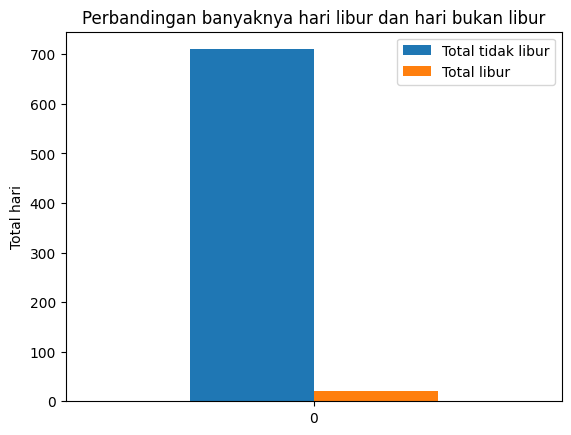

In [231]:
# melakukan visualisasi total hari libur di 2011-2012 serta perbandingannya dengan total hari tidak libur

total_holiday.plot(kind='bar', stacked=False)
plt.title('Perbandingan banyaknya hari libur dan hari bukan libur')
plt.xlabel(None)
plt.ylabel('Total hari')
plt.xticks(rotation=0)
plt.legend(['Total tidak libur', 'Total libur'])
plt.show()

In [215]:
# mendownload data untuk keperluan streamlit
merge_total_holiday.to_csv("merge_total_holiday.csv", index=False)

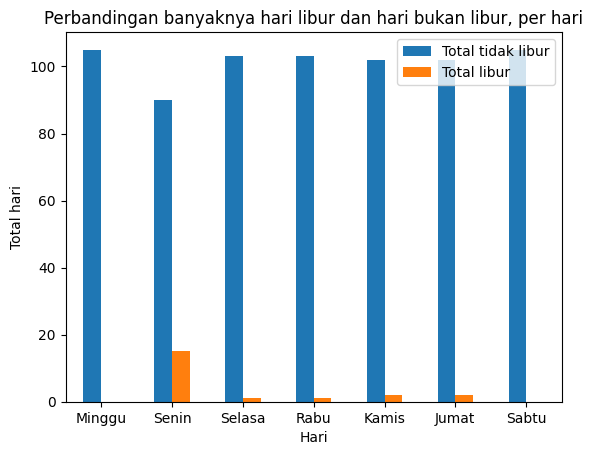

In [234]:
# visualisasi persebaran hari libur
merge_total_holiday.plot(x='weekday', kind='bar', stacked=False)
plt.title('Perbandingan banyaknya hari libur dan hari bukan libur, per hari')
plt.xlabel('Hari')
plt.ylabel('Total hari')
weekday_labels = ['Minggu', 'Senin', 'Selasa', 'Rabu', 'Kamis', 'Jumat', 'Sabtu']
plt.xticks(ticks=merge_total_holiday['weekday'], labels=weekday_labels)
plt.xticks(rotation=0)
plt.legend(['Total tidak libur', 'Total libur'])
plt.show()

### Pertanyaan 2:
Bagaimana tren penggunaan sepeda berubah sepanjang hari?

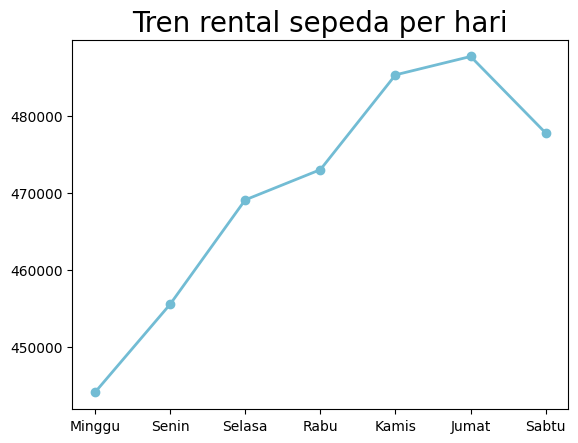

In [235]:
# melakukan visualisasi untuk melihat tren total rental sepeda per hari
plt.plot(bike_d_weekday['weekday'],bike_d_weekday['cnt'],marker='o', linewidth=2,color="#72BCD4")
plt.title("Tren rental sepeda per hari", loc="center", fontsize=20)
weekday_labels = ['Minggu', 'Senin', 'Selasa', 'Rabu', 'Kamis', 'Jumat', 'Sabtu']
plt.xticks(ticks=merge_total_holiday['weekday'], labels=weekday_labels)
plt.xticks(fontsize=10)
plt.yticks(fontsize=10)
plt.show()

### Pertanyaan 3:
Seberapa besar peningkatan penggunaan sepeda pada akhir pekan (Sabtu, Minggu) dibandingkan hari kerja?

In [220]:
# mendownload data untuk keperluan streamlit
mean_weekday.to_csv("mean_weekday.csv", index=False)

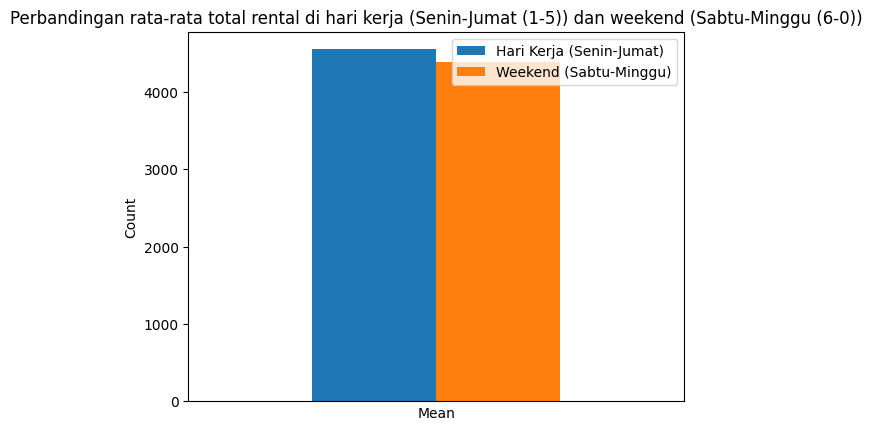

In [252]:
# perbandingan rata-rata total rental di hari kerja (Senin-Jumat (1-5)) dan weekend (Sabtu-Minggu (6-0))

mean_weekday.plot(kind='bar', stacked=False).set_xticks([])
plt.title('Perbandingan rata-rata total rental di hari kerja (Senin-Jumat (1-5)) dan weekend (Sabtu-Minggu (6-0))')
plt.xlabel('Mean')
plt.ylabel('Count')
plt.legend(['Hari Kerja (Senin-Jumat)', 'Weekend (Sabtu-Minggu)'])
plt.show()

Growth dari rata-rata hari kerja ke akhir pekan adalah sebesar -0.035353,sehingga dapat dikatakan bahwa terjadi penurunan pemakaian di akhir pekan.

### Pertanyaan 4:
Bagaimana performa penggunaan sepeda di hari libur?

Dari Pertanyaan 1, diperoleh bahwa hari yang memiliki hari libur terbanyak adalah hari Senin.

In [223]:
# mendownload data untuk keperluan streamlit
mean_most_holiday.to_csv("mean_most_holiday.csv", index=False)

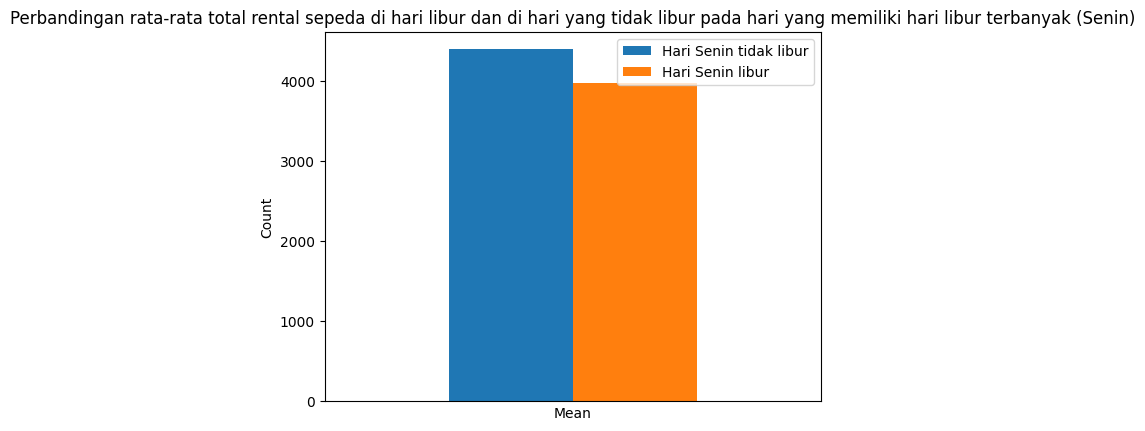

In [253]:
# melihat perbandingan rata-rata total rental sepeda di hari libur dan di hari yang tidak libur pada hari yang memiliki hari libur terbanyak (Senin)
mean_most_holiday.plot(kind='bar', stacked=False).set_xticks([])
plt.title('Perbandingan rata-rata total rental sepeda di hari libur dan di hari yang tidak libur pada hari yang memiliki hari libur terbanyak (Senin)')
plt.xlabel('Mean')
plt.ylabel('Count')
plt.xticks(rotation=0)
plt.legend(['Hari Senin tidak libur', 'Hari Senin libur'])
plt.show()

**Insight:**
- Pertanyaan 1: Ada berapa hari libur di tahun 2011-2012? Bagaimana persebarannya di tiap harinya? Terdapat total 21 hari libur di tahun 2011-2012. Hari Senin (1) adalah hari yang memiliki hari libur terbanyak, yaitu sebesar 15 hari.

- Pertanyaan 2: Bagaimana tren penggunaan sepeda berubah sepanjang hari?
Rata-rata pemakaian per hari adalah sebesar 470382 sepeda per hari.

- Pernyataan 3: Seberapa besar peningkatan penggunaan sepeda pada akhir pekan (Sabtu, Minggu) dibandingkan hari kerja?
Rata-rata pemakaian di hari kerja (1-5) adalah 4550 sepeda per hari.
Rata-rata pemakaian di akhir pekan (6_0) adalah 4389 sepeda per hari.
Growth dari rata-rata hari kerja ke akhir pekan adalah sebesar -0.035353, sehingga dapat dikatakan bahwa terjadi penurunan pemakaian di akhir pekan.

- Pernyataan 4: Bagaimana performa penggunaan sepeda di hari yang memiliki hari libur terbanyak?
Pada kasus ini, hari yang memiliki hari libur terbanyak adalah hari Senin.
Saat libur, rata-rata penggunaan sepeda di hari libur adalah 3973.66 dan rata-rata penggunaan sepeda di hari tidak libur adalah 4398.86.


## Analisis Lanjutan (Opsional)

Melihat hubungan lebih lanjut antara data temparatur (temp), kelembapan (hum), dan jumlah rental sepeda (cnt) untuk menilai apakah ketiga aspek tersebut berpengaruh satu-sama-lain.

<Axes: >

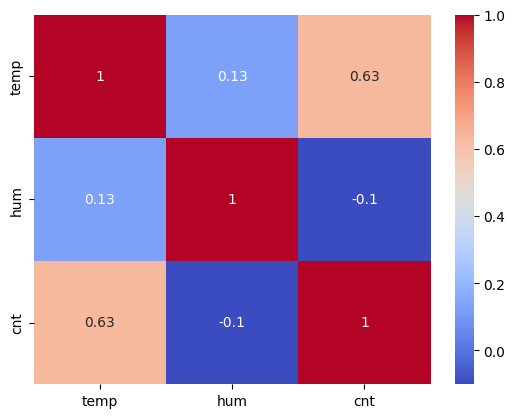

In [226]:
korelasi_antara_beberapa_data = bike_d[['temp', 'hum', 'cnt']].corr()

sns.heatmap(korelasi_antara_beberapa_data, annot=True, cmap="coolwarm")

Dari gambar, dapat diperoleh informasi bahwa nilai tertinggi adalah 0.63 pada hubungan antara tempatur dan total rental, sedangkan hubungan antara temperatur dan kelembapan tidak signifikan, dan hubungan kelembapan dan total rental juga tidak signifikan.

## Conclusion

- Pertanyaan 1: Ada berapa hari libur di tahun 2011-2012? Bagaimana persebarannya di tiap harinya? Terdapat total 21 hari libur di tahun 2011-2012. Hari Senin (1) adalah hari yang memiliki hari libur terbanyak, yaitu sebesar 15 hari.

- Pertanyaan 2: Bagaimana tren penggunaan sepeda berubah sepanjang hari?
Rata-rata pemakaian per hari adalah sebesar 470382 sepeda per hari.

- Pernyataan 3: Seberapa besar peningkatan penggunaan sepeda pada akhir pekan (Sabtu, Minggu) dibandingkan hari kerja?
Rata-rata pemakaian di hari kerja (1-5) adalah 4550 sepeda per hari.
Rata-rata pemakaian di akhir pekan (6_0) adalah 4389 sepeda per hari.
Growth dari rata-rata hari kerja ke akhir pekan adalah sebesar -0.035353, sehingga dapat dikatakan bahwa terjadi penurunan pemakaian di akhir pekan.

- Pernyataan 4: Bagaimana performa penggunaan sepeda di hari yang memiliki hari libur terbanyak?
Pada kasus ini, hari yang memiliki hari libur terbanyak adalah hari Senin.
Saat libur, rata-rata penggunaan sepeda di hari libur adalah 3973.66 dan rata-rata penggunaan sepeda di hari tidak libur adalah 4398.86.

- Dari analisis lanjutan, diperoleh informasi bahwa nilai tertinggi adalah 0.63 pada hubungan antara tempatur dan total rental, sedangkan hubungan antara temperatur dan kelembapan tidak signifikan, dan hubungan kelembapan dan total rental juga tidak signifikan.